In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import SGD

In [3]:
train_df=pd.read_csv('./train.csv')

In [4]:
train_df.head()
train_df.shape

(43, 2)

In [8]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
j=0
#Retrieving the images and their labels 
k=0
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open('./train/'+str(i)+'/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            k = k + 1
        except:
            # print("Error loading image")
            j=j+1

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape, k)
# Number of Error image
print(j)

(14405, 30, 30, 3) (14405,) 14405
0


In [10]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_test_labels = y_test
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(11524, 30, 30, 3) (2881, 30, 30, 3) (11524,) (2881,)


In [11]:
print(X_test[0].shape)
print(y_test.shape)

(30, 30, 3)
(2881, 43)


In [13]:
model_r = Sequential()
model_r.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='relu', input_shape=X_train.shape[1:]))
model_r.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='relu'))
model_r.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='relu'))
model_r.add(Flatten())
model_r.add(Dense(512, activation='relu'))
model_r.add(Dense(43, activation='softmax'))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_r.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
history_relu = model_r.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
361/361 [==============================] - 3s 7ms/step - loss: 2.4288 - accuracy: 0.4424 - val_loss: 1.1145 - val_accuracy: 0.7178
Epoch 2/20
361/361 [==============================] - 2s 6ms/step - loss: 0.9546 - accuracy: 0.7462 - val_loss: 0.9270 - val_accuracy: 0.7494
Epoch 3/20
361/361 [==============================] - 2s 6ms/step - loss: 0.6817 - accuracy: 0.8135 - val_loss: 0.6710 - val_accuracy: 0.8376
Epoch 4/20
361/361 [==============================] - 2s 6ms/step - loss: 0.5156 - accuracy: 0.8606 - val_loss: 0.6082 - val_accuracy: 0.8410
Epoch 5/20
361/361 [==============================] - 2s 6ms/step - loss: 0.3975 - accuracy: 0.8917 - val_loss: 0.4813 - val_accuracy: 0.8796
Epoch 6/20
361/361 [==============================] - 2s 5ms/step - loss: 0.2992 - accuracy: 0.9175 - val_loss: 0.5068 - val_accuracy: 0.8785
Epoch 7/20
361/361 [==============================] - 2s 5ms/step - loss: 0.2492 - accuracy: 0.9305 - val_loss: 0.4490 - val_accuracy: 0.9039
Epoch 

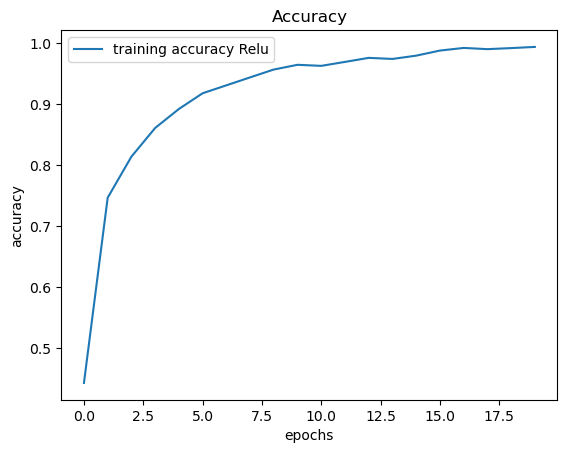

In [14]:
plt.figure(0)
plt.plot(history_relu.history['accuracy'], label='training accuracy Relu')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [15]:
model_r.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        448       
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 43)                22059     
                                                                 
Total params: 177,227
Trainable params: 177,227
Non-tr

In [16]:
predict_x=model_r.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

91/91 [==============================] - 0s 2ms/step


In [17]:
y_labels=[]
for value in y_test_labels:
    y_labels.append(int(value))

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_labels, classes_x))

0.9187782020131898
